In [18]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()

def load_special_edu_support_percentage():
    melted_df = loader.load('students_with_special_educational_support_no_gender')

    melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
    melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
    total_over_years = melted_df.groupby(['year','school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type = children_type.rename(columns={'total': 'Value'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()


    merged_df = pd.merge(total_over_years, child_amount_per_year,on=['year','school'])
    merged_df['edu_support_relative'] = merged_df['total']/merged_df['Value'] 
    return merged_df



def load_no_hauptschulabschluss_percentage(ignore_special_schools=False):
    df_melted = loader.load('no_hauptschulabschluss')
    if(ignore_special_schools):
        df_melted = df_melted[df_melted['school']!="Special schools"] #Drop special schools because they have special effects
    df_melted['year'] = pd.to_datetime(df_melted['year'], format='%Y')
    df_melted['total'] = pd.to_numeric(df_melted['total'], errors='coerce')
    total_students_by_year = df_melted.groupby(['year', 'school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type = children_type.rename(columns={'total': 'Value'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()

    merged_df = pd.merge(total_students_by_year, child_amount_per_year, on=['year','school'])
    merged_df['no_hauptschulabschluss_relative'] = merged_df['total']/merged_df['Value'] 
    return merged_df

no_hauptschulabschluss = load_no_hauptschulabschluss_percentage(True)
special_edu_support = load_special_edu_support_percentage()

no_hauptschulabschluss


total      Value  \
year       school                                                          
1998-01-01 Adult education colleges                       0.0    14099.0   
           Evening grammar schools                        0.0    16151.0   
           Evening intermediate schools                   0.0    14684.0   
           Evening secondary general schools              0.0     1171.0   
           Free Waldorf Schools                         536.0    67268.0   
...                                                       ...        ...   
2021-01-01 Grammar schools (9 years of schooling)      1883.0  1123734.0   
           Integrated comprehensive schools           86841.0  1096389.0   
           Intermediate schools                       13652.0   764776.0   
           Schools with various courses of education  81039.0   528834.0   
           Secondary general schools                  36609.0   323829.0   

                                                      no_hauptschulabschluss_relative  
year       school                                                                      
1998-01-01 Adult education colleges                                          0.000000  
           Evening grammar schools                                           0.000000  
           Evening intermediate schools                                      0.000000  
           Evening secondary general schools                                 0.000000  
           Free Waldorf Schools                                              0.007968  
...                                                                               ...  
2021-01-01 Grammar schools (9 years of schooling)                            0.001676  
           Integrated comprehensive schools                                  0.079206  
           Intermediate schools                                              0.017851  
           Schools with various courses of education                         0.153241  
           Secondary general schools                                         0.113050  

[264 rows x 3 columns]

In [19]:
merged_df = pd.merge(no_hauptschulabschluss, special_edu_support, on=['year','school'])
correlation_coefficient = merged_df['edu_support_relative'].corr(merged_df['no_hauptschulabschluss_relative'])
correlation_coefficient

0.45349916880536867

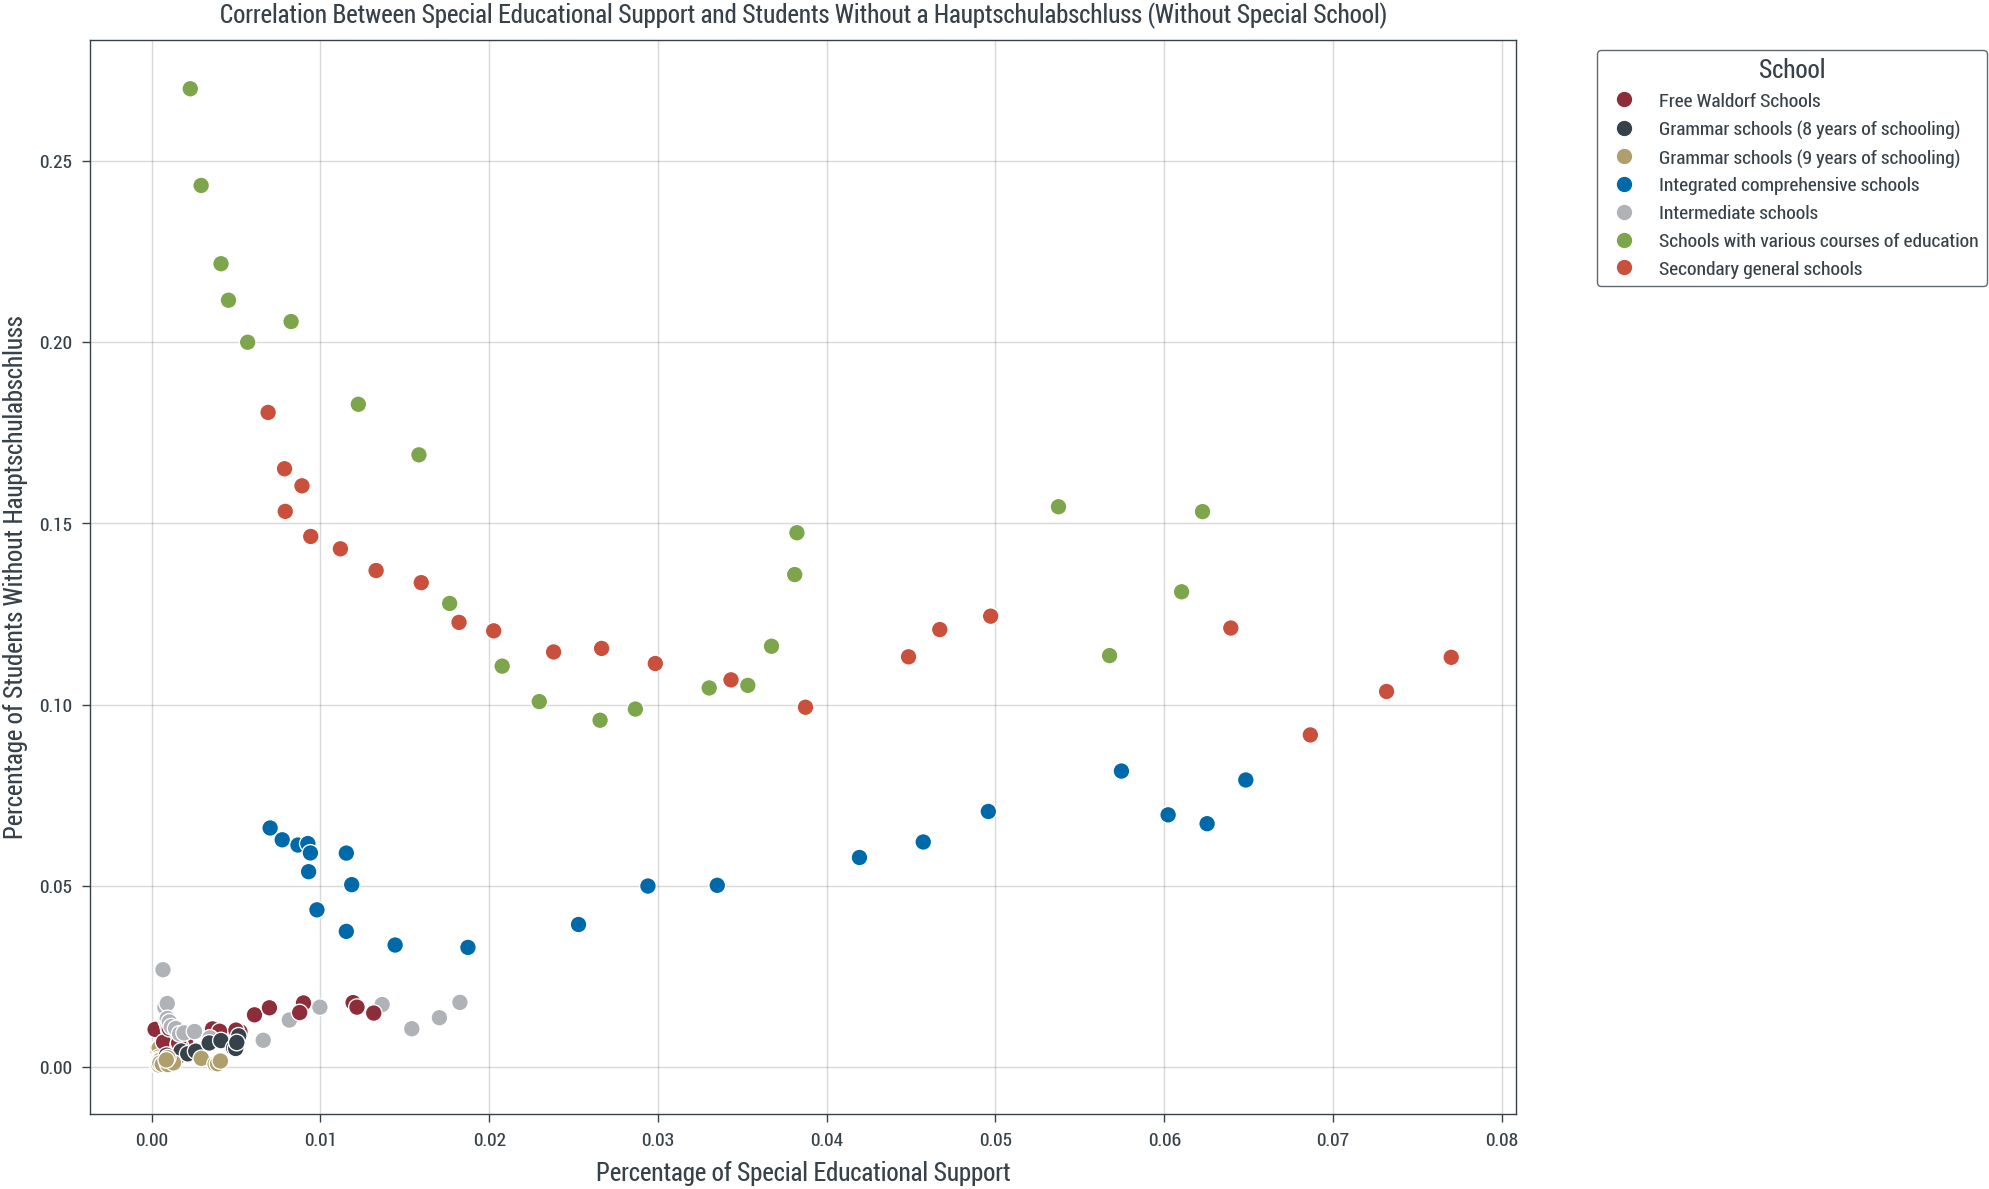

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='edu_support_relative', y='no_hauptschulabschluss_relative', hue='school')
plt.title('Correlation Between Special Educational Support and Students Without a Hauptschulabschluss (Without Special School)')
plt.xlabel('Percentage of Special Educational Support')
plt.ylabel('Percentage of Students Without Hauptschulabschluss')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()